In [106]:
#Instal Library yang dibutuhkan
##import pandas sebagai pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, MonthLocator

##instal pip package statsmodels
%pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

##instal pip package plotly
%pip install plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%pip install --upgrade nbformat ipywidgets plotly
import plotly.io as pio
pio.renderers.default = "browser"


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Import data dari file CSV
data = pd.read_csv("/Users/fikrihaidarr/Downloads/cars_datasets_2025.csv", encoding="latin1")

In [21]:
#Menampilkan informasi dasar tentang data
desc = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


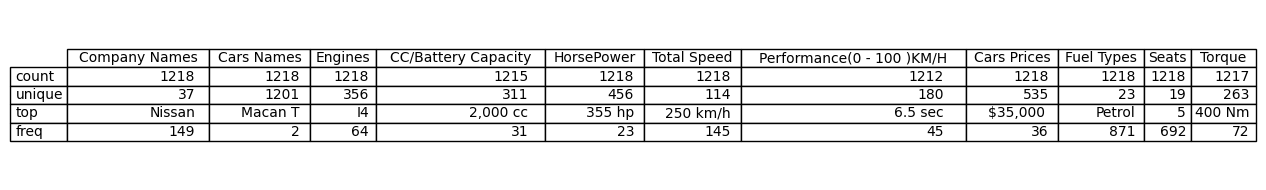

In [22]:
#Analisis Deskriptif Data 1
##Menyimpan deskripsi data ke variabel
desc = data.describe(include='all')

##Plot tabel menggunakan matplotlib
fig, ax = plt.subplots(figsize=(12, min(0.5*len(desc), 15)))
ax.axis('off')
tbl = ax.table(cellText=desc.values, colLabels=desc.columns, rowLabels=desc.index, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(desc.columns))))

plt.tight_layout()
plt.show()


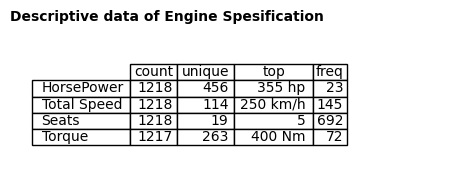

In [23]:
#Analisis Deskriptif Data 2
##Melihat deskripsi data pada kolom tertentu
kolom_pilihan = ['HorsePower', 'Total Speed', 'Performance', 'Car Prices', 'Seats', 'Torque']

##Pastikan hanya kolom yang ada di data yang diambil
kolom_ada = [col for col in kolom_pilihan if col in data.columns]

desc_kolom = data[kolom_ada].describe().T  # Transpose agar lebih mudah dibaca

##Tampilkan sebagai tabel gambar
fig, ax = plt.subplots(figsize=(5, min(0.5*len(desc_kolom), 10)))
ax.axis('off')
tbl = ax.table(cellText=desc_kolom.values, colLabels=desc_kolom.columns, rowLabels=desc_kolom.index, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(desc_kolom.columns))))

plt.title('Descriptive data of Engine Spesification', fontsize=10, fontweight='bold', loc='left')
plt.tight_layout()
plt.show()

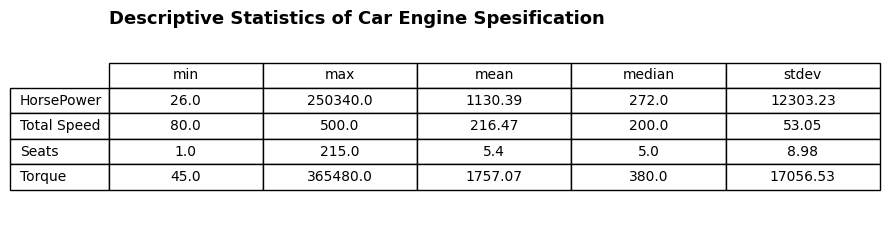

In [26]:
#Analisis deskriptif data 3
##Salin data utama ke data_clean untuk pembersihan
data_clean = data.copy()

kolom_pilihan = ['HorsePower', 'Total Speed', 'Performance', 'Car Prices', 'Seats', 'Torque']
kolom_ada = [col for col in kolom_pilihan if col in data_clean.columns]

##Bersihkan nilai non-digit dan konversi ke numerik
for col in kolom_ada:
    data_clean[col] = data_clean[col].astype(str).str.replace(r'[^0-9\.-]', '', regex=True)
    data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce')

##Hitung statistik deskriptif tambahan
stat_df = pd.DataFrame({
    'min': data_clean[kolom_ada].min(),
    'max': data_clean[kolom_ada].max(),
    'mean': data_clean[kolom_ada].mean().round(2),
    'median': data_clean[kolom_ada].median(),
    'stdev': data_clean[kolom_ada].std().round(2),
})

##Tampilkan sebagai tabel gambar
fig, ax = plt.subplots(figsize=(9, 0.6 * max(len(stat_df), 4)))
ax.axis('off')

table = ax.table(
    cellText=stat_df.values,
    colLabels=stat_df.columns,
    rowLabels=stat_df.index,
    loc='center',
    cellLoc='center'
)

##Tambahkan garis tepi pada semua sel
for cell in table.get_celld().values():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.title('Descriptive Statistics of Car Engine Spesification', fontsize=13, fontweight='bold', loc='left')
plt.tight_layout()
plt.show()

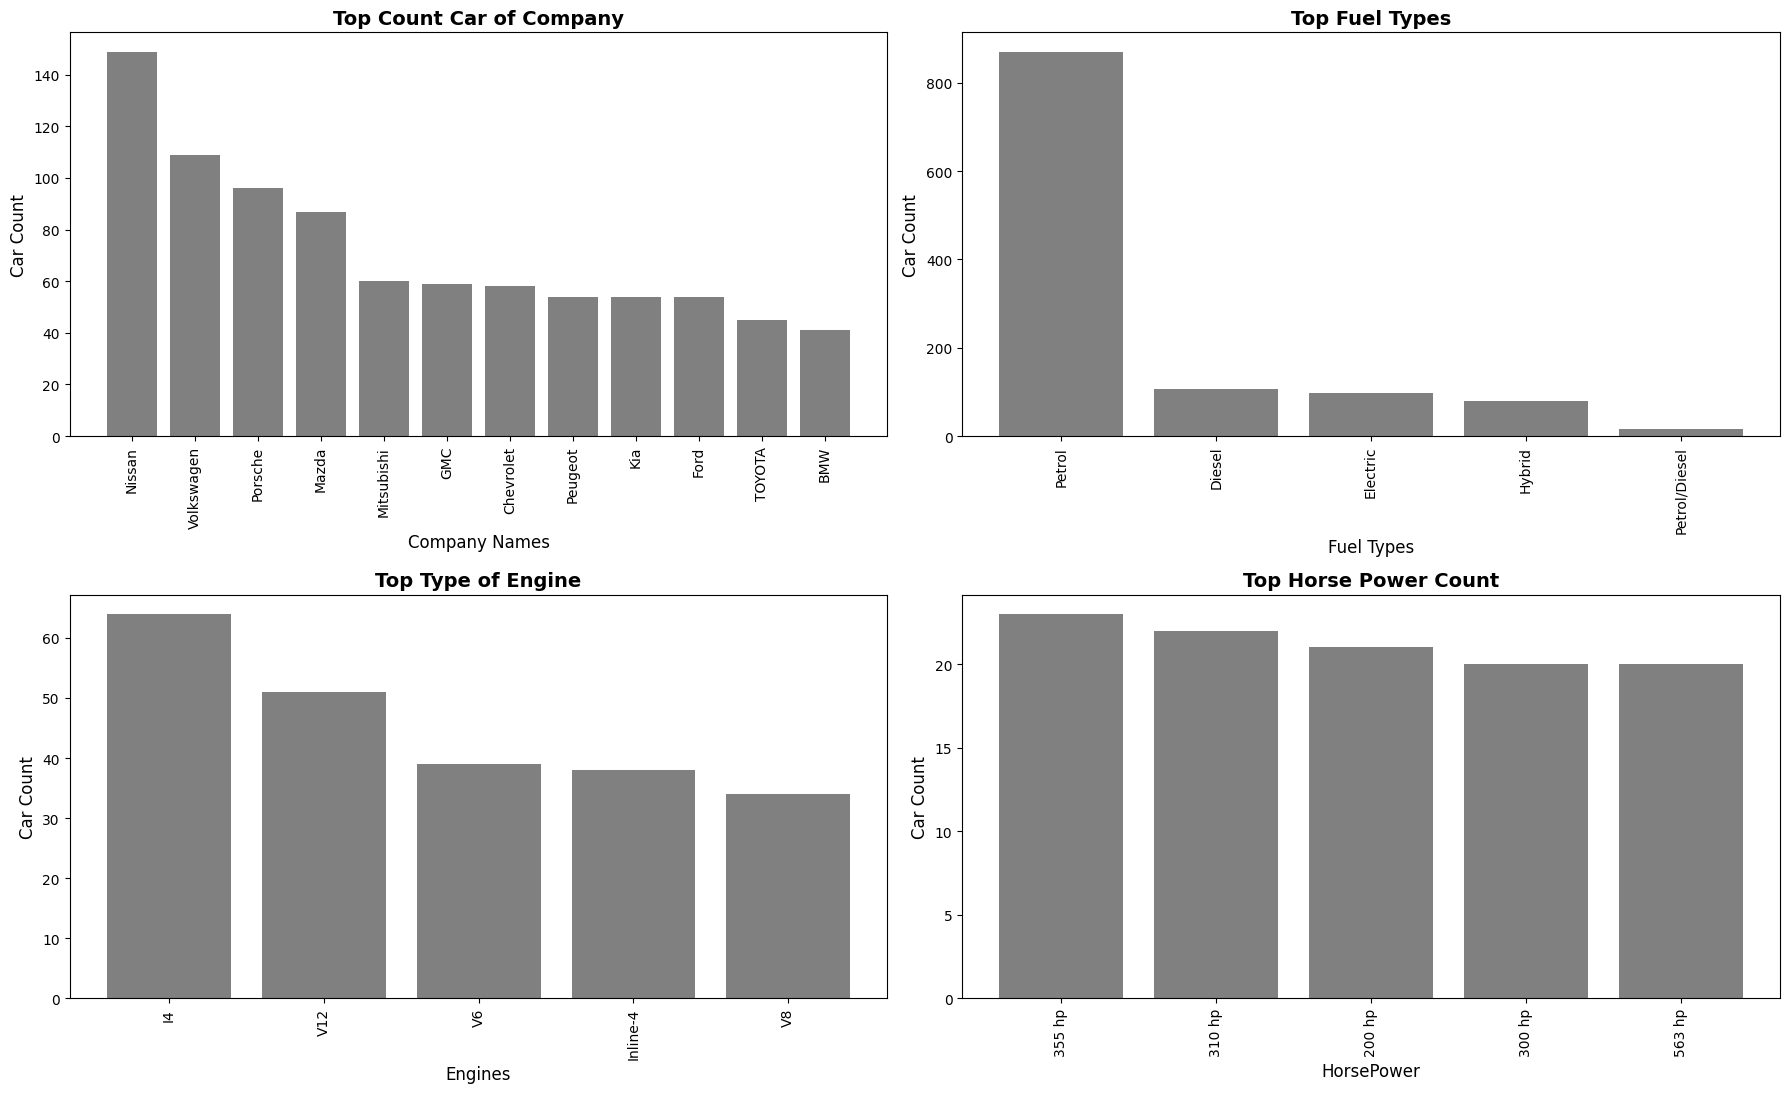

In [25]:

company_count = data['Company Names'].value_counts().head(12)
fuel_type_count = data['Fuel Types'].value_counts().nlargest()
engine_count = data['Engines'].value_counts().nlargest(5)
horsepower_count = data['HorsePower'].value_counts().nlargest(5)

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

axs[0, 0].bar(company_count.index.str[:10], company_count.values, color='gray')
axs[0, 0].set_title('Top Count Car of Company', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Company Names', fontsize=12)
axs[0, 0].set_ylabel('Car Count', fontsize=12)
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].bar(fuel_type_count.index, fuel_type_count.values, color='gray')
axs[0, 1].set_title('Top Fuel Types', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Fuel Types', fontsize=12)
axs[0, 1].set_ylabel('Car Count', fontsize=12)
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].bar(engine_count.index, engine_count.values, color='gray')
axs[1, 0].set_title('Top Type of Engine', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Engines', fontsize=12)
axs[1, 0].set_ylabel('Car Count', fontsize=12)
axs[1, 0].tick_params(axis='x', rotation=90)

axs[1, 1].bar(horsepower_count.index, horsepower_count.values, color='gray')
axs[1, 1].set_title('Top Horse Power Count', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('HorsePower', fontsize=12)
axs[1, 1].set_ylabel('Car Count', fontsize=12)
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

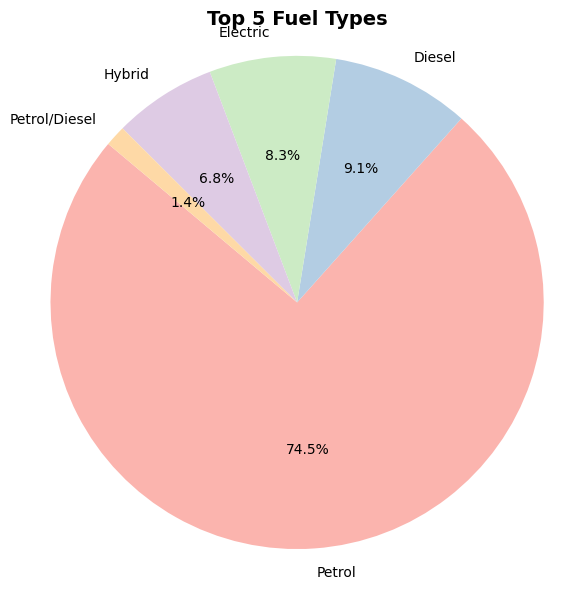

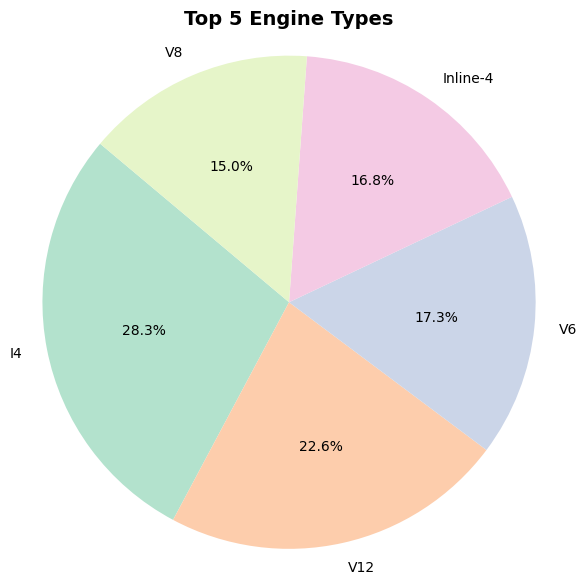

In [27]:
#Membuat pie chart
##Pie chart Top Fuel Types
top_fuels = data['Fuel Types'].value_counts().nlargest(5)
plt.figure(figsize=(7, 7))
plt.pie(top_fuels.values, labels=top_fuels.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Top 5 Fuel Types', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

##Pie chart Top Engine Types
top_engines = data['Engines'].value_counts().nlargest(5)
plt.figure(figsize=(7, 7))
plt.pie(top_engines.values, labels=top_engines.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
plt.title('Top 5 Engine Types', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

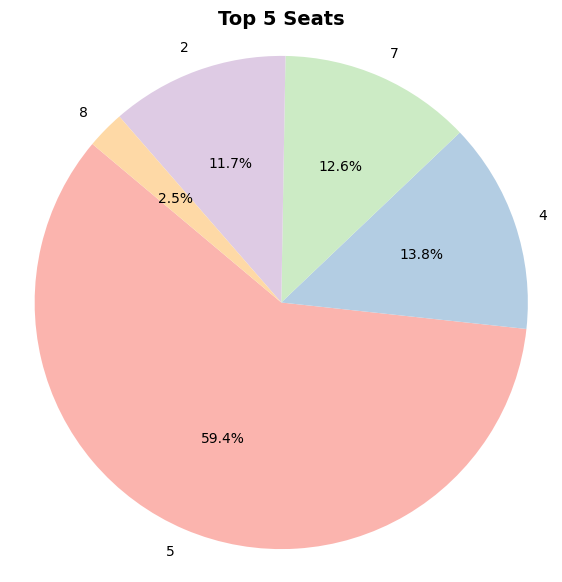

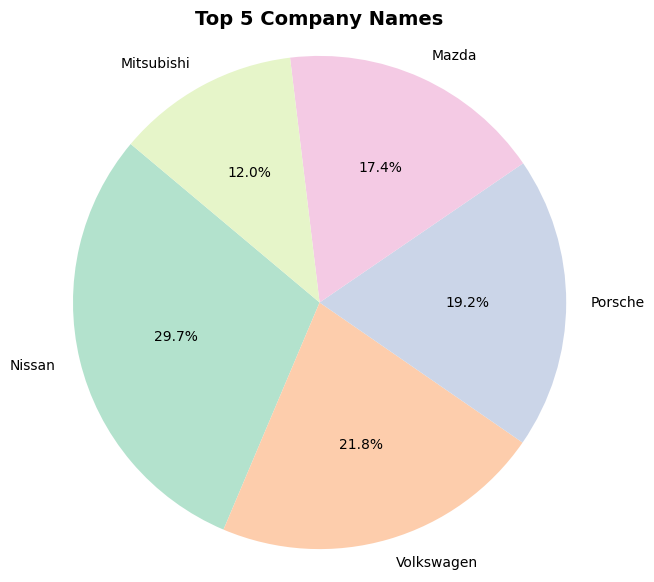

In [28]:
# Pie chart Top 5 Seats
top_seats = data['Seats'].value_counts().nlargest(5)
plt.figure(figsize=(7, 7))
plt.pie(top_seats.values, labels=top_seats.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Top 5 Seats', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# Pie chart Top 5 Company Names
top_companies = data['Company Names'].value_counts().nlargest(5)
plt.figure(figsize=(7, 7))
plt.pie(top_companies.values, labels=top_companies.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
plt.title('Top 5 Company Names', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

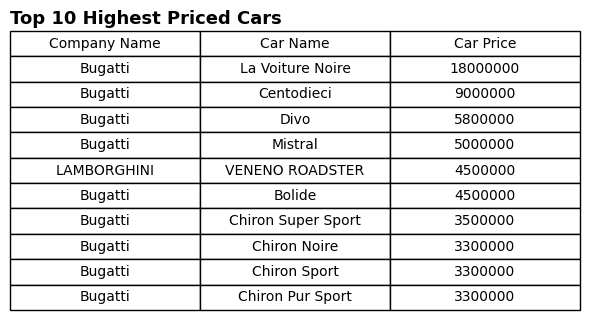

In [70]:

#Top 10 Mobil Termahal
##Urutan data berdasarkan 'Cars Prices' secara menurun dan ambil 10 teratas
top_10_cars = (
    data.sort_values(by='Cars Prices', ascending=False)
        .head(10)
        .reset_index(drop=True)
)

##Format kolom 'Cars Prices' menjadi integer tanpa desimal
data['Cars Prices'] = data['Cars Prices'].round(0).astype(int)

##Tampilkan sebagai tabel gambar
fig, ax = plt.subplots(figsize=(6, 0.33 * len(top_10_cars)))
ax.axis('off')

table = ax.table(
    cellText=top_10_cars[['Company Names', 'Cars Names', 'Cars Prices']].values,
    colLabels=['Company Name', 'Car Name', 'Car Price'],
    loc='center',
    cellLoc='center'
)

##Tambahkan garis tepi tabel
for cell in table.get_celld().values():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

plt.title(
    'Top 10 Highest Priced Cars',
    fontsize=13,
    fontweight='bold',
    loc='left'
)

plt.tight_layout()
plt.show()


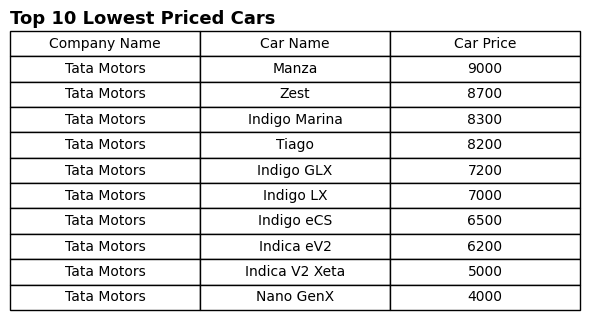

In [ ]:
#Top 10 Mobil Termurah
##Urutan data berdasarkan 'Cars Prices' secara meningkat dan ambil 10 terbawah
top_10_cars = (
    data.sort_values(by='Cars Prices', ascending=False)
        .tail(10)
        .reset_index(drop=True)
)

##Format kolom 'Cars Prices' menjadi integer tanpa desimal
data['Cars Prices'] = data['Cars Prices'].round(0).astype(int)

##Tampilkan sebagai tabel gambar
fig, ax = plt.subplots(figsize=(6, 0.33 * len(top_10_cars)))
ax.axis('off')

table = ax.table(
    cellText=top_10_cars[['Company Names', 'Cars Names', 'Cars Prices']].values,
    colLabels=['Company Name', 'Car Name', 'Car Price'],
    loc='center',
    cellLoc='center'
)

##Tambahkan garis tepi tabel
for cell in table.get_celld().values():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

plt.title(
    'Top 10 Lowest Priced Cars',
    fontsize=13,
    fontweight='bold',
    loc='left'
)

plt.tight_layout()
plt.show()

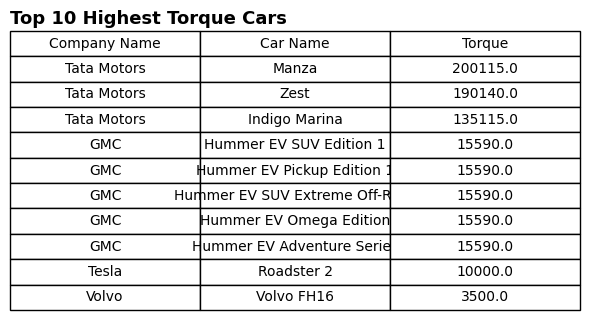

In [99]:
#Top 10 Mobil Torsi Tinggi

data['Torque'] = (
    data['Torque']
    .astype(str)
    .str.replace(r'[^0-9\.-]', '', regex=True)
)

data['Torque'] = pd.to_numeric(data['Torque'], errors='coerce')
top_10_torque = (
    data.sort_values(by='Torque', ascending=False)
        .head(10)
        .reset_index(drop=True)
)
##Tampilkan sebagai tabel gambar
fig, ax = plt.subplots(figsize=(6, 0.33 * len(top_10_torque)))
ax.axis('off') 
table = ax.table(
    cellText=top_10_torque[['Company Names', 'Cars Names', 'Torque']].values,
    colLabels=['Company Name', 'Car Name', 'Torque'],
    loc='center',
    cellLoc='center'
) 
##Tambahkan garis tepi tabel
for cell in table.get_celld().values():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)  
table.auto_set_font_size(False) 
table.set_fontsize(10)
table.scale(1, 1.4) 
plt.title(
    'Top 10 Highest Torque Cars',
    fontsize=13,
    fontweight='bold',
    loc='left'
)
plt.tight_layout()
plt.show()